In [1]:
!pip install scikit-survival
!pip install lifelines

     |████████████████████████████████| 3.1 MB 16.4 MB/s 
     |████████████████████████████████| 349 kB 23.6 MB/s 
     |████████████████████████████████| 68 kB 7.0 MB/s 
     |████████████████████████████████| 38.1 MB 381 kB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=735f0b4ada0a30b9d218a077443fa1f9011c73b6d04be822b38101cdc70bf351
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter
import numpy as np

In [4]:
# Sometimes it works when ran twice

import sksurv
import sksurv.datasets

In [58]:
'''
Variable 	Name		Description			                Codes / Values
*******************************************************************************************************
1		     id		    Identification Number			    1 - 500
2		    age		    Age at Hospital Admission		    Years
3 	    	gender		Gender 					            0 = Male, 1 = Female
4    		hr		    Initial Heart Rate			        Beats per minute
5		    sysbp		Initial Systolic Blood Pressure 	mmHg
6	    	diasbp		Initial Diastolic Blood Pressure	mmHg
7    		bmi		    Body Mass Index			 	        kg/m^2
8		    cvd		    History of Cardiovascular Disease	0 = No, 1 = Yes						
9		    afb		    Atrial Fibrillation			        0 = No, 1 = Yes						
10  		sho		    Cardiogenic Shock			        0 = No, 1 = Yes						
11  		chf		    Congestive Heart Complications		0 = No, 1 = Yes						
12  		av3		    Complete Heart Block			    0 = No, 1 = Yes				
13  		miord		MI Order 				            0 = First, 1 = Recurrent
14  		mitype		MI Type 				            0 = non Q-wave, 1 = Q-wave
15  		year		Cohort Year				            1 = 1997, 2 = 1999, 3 = 2001				
16  		admitdate	Hospital Admission Date 		    mm/dd/yyyy
17  		disdate		Hospital Discharge Date 		    mm/dd/yyyy
18  		fdate		Date of last Follow Up 			    mm/dd/yyyy
19  		los		    Length of Hospital Stay			    Days from Hospital Admission
								 	                            to Hospital Discharge
20 	    	dstat		Discharge Status from Hospital		0 = Alive, 1 = Dead
21	    	lenfol		Total Length of Follow-up		    Days from Hospital Admission Date
									                            to Date of Last Follow-up 
22	    	event		Vital Status at Last Follow-up		0 = Alive 1 = Dead
'''

'\nVariable \tName\t\tDescription\t\t\t                Codes / Values\n*******************************************************************************************************\n1\t\t     id\t\t    Identification Number\t\t\t    1 - 500\n2\t\t    age\t\t    Age at Hospital Admission\t\t    Years\n3 \t    \tgender\t\tGender \t\t\t\t\t            0 = Male, 1 = Female\n4    \t\thr\t\t    Initial Heart Rate\t\t\t        Beats per minute\n5\t\t    sysbp\t\tInitial Systolic Blood Pressure \tmmHg\n6\t    \tdiasbp\t\tInitial Diastolic Blood Pressure\tmmHg\n7    \t\tbmi\t\t    Body Mass Index\t\t\t \t        kg/m^2\n8\t\t    cvd\t\t    History of Cardiovascular Disease\t0 = No, 1 = Yes\t\t\t\t\t\t\n9\t\t    afb\t\t    Atrial Fibrillation\t\t\t        0 = No, 1 = Yes\t\t\t\t\t\t\n10  \t\tsho\t\t    Cardiogenic Shock\t\t\t        0 = No, 1 = Yes\t\t\t\t\t\t\n11  \t\tchf\t\t    Congestive Heart Complications\t\t0 = No, 1 = Yes\t\t\t\t\t\t\n12  \t\tav3\t\t    Complete Heart Block\t\t\t    0 = No, 1 =

In [45]:
# load data
data, labels = sksurv.datasets.load_whas500()

In [46]:
data = data.astype(np.int32)
print(data.columns)

Index(['afb', 'age', 'av3', 'bmi', 'chf', 'cvd', 'diasbp', 'gender', 'hr',
       'los', 'miord', 'mitype', 'sho', 'sysbp'],
      dtype='object')


In [47]:
# total admission date + total follow up days
data['event'] = [label[0] for label in labels]
# data['time'] = [x.days for x in data.time]

data.head()

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp,event
0,1,83,0,25,0,1,78,0,89,5,1,0,0,152,False
1,0,49,0,24,0,1,60,0,84,5,0,1,0,120,False
2,0,70,0,22,0,0,88,1,83,5,0,1,0,147,False
3,0,70,0,26,1,1,76,0,65,10,0,1,0,123,True
4,0,70,0,24,0,1,85,0,63,6,0,1,0,135,False


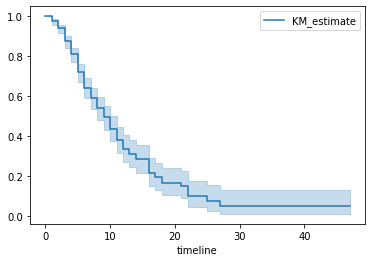

In [48]:
kmf = KaplanMeierFitter()
kmf.fit(durations =  data.los, event_observed = data['event'])
kmf.plot_survival_function()

In [49]:
data_male = data.loc[data["gender"]==0]
data_female = data[data["gender"]==1]

In [50]:
data_male.head(6)

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp,event
0,1,83,0,25,0,1,78,0,89,5,1,0,0,152,False
1,0,49,0,24,0,1,60,0,84,5,0,1,0,120,False
3,0,70,0,26,1,1,76,0,65,10,0,1,0,123,True
4,0,70,0,24,0,1,85,0,63,6,0,1,0,135,False
5,0,70,1,23,0,1,54,0,76,1,0,0,0,83,True
6,0,57,0,39,0,1,116,0,73,5,0,1,0,191,False


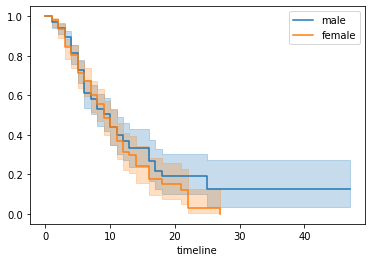

In [51]:
kmf = KaplanMeierFitter()
kmf.fit(durations =  data_male.los, event_observed = data_male['event'], label='male')
ax = kmf.plot_survival_function()

kmf.fit(durations =  data_female.los, event_observed = data_female['event'], label='female')
ax = kmf.plot_survival_function(ax =ax)

In [52]:
data_cvd_0 = data.loc[data["cvd"]==0]
data_cvd_1 = data[data["cvd"]==1]

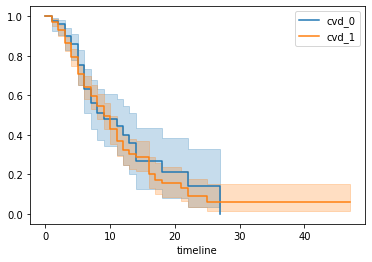

In [53]:
kmf = KaplanMeierFitter()
kmf.fit(durations =  data_cvd_0.los, event_observed = data_cvd_0['event'], label='cvd_0')
ax = kmf.plot_survival_function()

kmf.fit(durations =  data_cvd_1.los, event_observed = data_cvd_1['event'], label='cvd_1')
ax = kmf.plot_survival_function(ax =ax)

In [54]:
data_miord_0 = data.loc[data["miord"]==0]
data_miord_1 = data[data["miord"]==1]

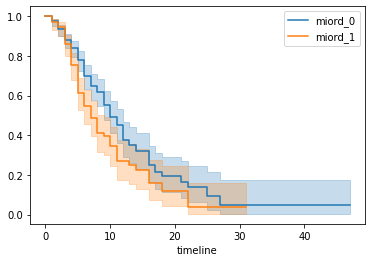

In [55]:
kmf = KaplanMeierFitter()
kmf.fit(durations =  data_miord_0.los, event_observed = data_miord_0['event'], label='miord_0')
ax = kmf.plot_survival_function()

kmf.fit(durations =  data_miord_1.los, event_observed = data_miord_1['event'], label='miord_1')
ax = kmf.plot_survival_function(ax =ax)

In [56]:
data_av3_0 = data.loc[data["av3"]==0]
data_av3_1 = data[data["av3"]==1]

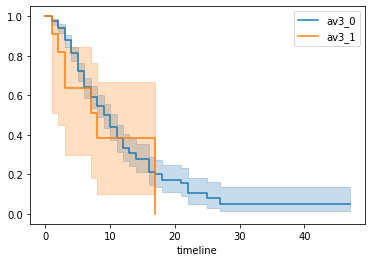

In [57]:
kmf = KaplanMeierFitter()
kmf.fit(durations =  data_av3_0.los, event_observed = data_av3_0['event'], label='av3_0')
ax = kmf.plot_survival_function()

kmf.fit(durations =  data_av3_1.los, event_observed = data_av3_1['event'], label='av3_1')
ax = kmf.plot_survival_function(ax =ax)

In [61]:
data_age_40 = data.loc[(data["age"]>=40) & (data["age"]< 50)]
data_age_50 = data.loc[(data["age"]>=50) & (data["age"]< 60)]
data_age_60 = data.loc[(data["age"]>=60) & (data["age"]< 70)]
data_age_70 = data.loc[(data["age"]>=70) & (data["age"]< 80)]
data_age_80 = data.loc[data["age"]>=80]

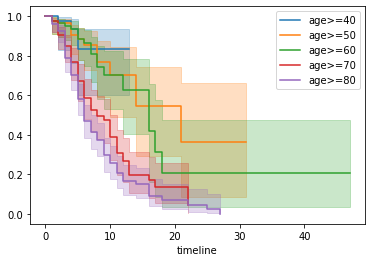

In [62]:
kmf = KaplanMeierFitter()
kmf.fit(durations =  data_age_40.los, event_observed = data_age_40['event'], label='age>=40')
ax = kmf.plot_survival_function()

kmf.fit(durations =  data_age_50.los, event_observed = data_age_50['event'], label='age>=50')
ax = kmf.plot_survival_function(ax =ax)

kmf.fit(durations =  data_age_60.los, event_observed = data_age_60['event'], label='age>=60')
ax = kmf.plot_survival_function(ax =ax)

kmf.fit(durations =  data_age_70.los, event_observed = data_age_70['event'], label='age>=70')
ax = kmf.plot_survival_function(ax =ax)

kmf.fit(durations =  data_age_80.los, event_observed = data_age_80['event'], label='age>=80')
ax = kmf.plot_survival_function(ax =ax)